<a href="https://colab.research.google.com/github/EgiNS/Tugas-Akhir-Lab-iSmile/blob/main/TugasAkhir_iSmile_EgiNawwarSukma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("train.csv")
data_test = pd.read_csv("data_test.csv")

In [ ]:
df.head()

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke
0,100000,Laki-laki,43,tidak,tidak,sudah,swasta,Pedesaan,96.39,26.1,mantan perokok,0
1,100001,Perempuan,58,tidak,tidak,sudah,swasta,Pedesaan,114.07,21.2,tidak,0
2,100002,Laki-laki,29,tidak,tidak,belum,swasta,Pedesaan,118.96,29.7,tidak,0
3,100003,Laki-laki,54,tidak,tidak,sudah,Wirausaha,Perkotaan,73.01,27.7,tidak,0
4,100004,Laki-laki,78,ya,ya,sudah,Wirausaha,Perkotaan,243.82,36.3,mantan perokok,0


In [ ]:
data_test.head()

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok
0,2000,Laki-laki,24,tidak,tidak,belum,belum bekerja,Perkotaan,83.45,25.3,tidak
1,2001,Perempuan,81,tidak,tidak,sudah,swasta,Perkotaan,127.35,35.6,mantan perokok
2,2002,Laki-laki,41,tidak,tidak,sudah,PNS,Pedesaan,65.00,21.0,perokok aktif
3,2003,Laki-laki,30,tidak,tidak,sudah,Wirausaha,Perkotaan,88.30,32.0,tidak
4,2004,Laki-laki,50,ya,tidak,sudah,Wirausaha,Perkotaan,63.15,25.1,tidak


In [ ]:
df.isnull().sum()

id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
stroke                  0
dtype: int64

In [ ]:
data_test.isnull().sum()

id_pasien               0
jenis_kelamin           0
umur                    0
hipertensi              0
penyakit_jantung        0
sudah_menikah           0
jenis_pekerjaan         0
jenis_tempat_tinggal    0
rata2_level_glukosa     0
bmi                     0
merokok                 0
dtype: int64

In [ ]:
gender = pd.get_dummies(df["jenis_kelamin"], drop_first=True)
gender.head(10)

,Perempuan
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [ ]:
darting = pd.get_dummies(df["hipertensi"], drop_first=True)
darting.head(10)

,ya
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
jantung = pd.get_dummies(df["penyakit_jantung"], drop_first=True)
jantung.head(10)

,ya
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
nikah = pd.get_dummies(df["sudah_menikah"], drop_first=True)
nikah.head(10)

,sudah
0,1
1,1
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,1


In [ ]:
pekerjaan = pd.get_dummies(df["jenis_pekerjaan"], drop_first=True)
pekerjaan.head(10)

,Wirausaha,belum bekerja,swasta
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
5,0,0,0
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [ ]:
tinggal = pd.get_dummies(df["jenis_tempat_tinggal"], drop_first=True)
tinggal.head(10)

,Perkotaan
0,0
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,1
9,0


In [ ]:
rokok = pd.get_dummies(df["merokok"], drop_first=True)
rokok.head(10)

,perokok aktif,tidak
0,0,0
1,0,1
2,0,1
3,0,1
4,0,0
5,0,1
6,0,1
7,0,0
8,0,0
9,0,1


In [ ]:
data_prep = pd.concat([df,gender,darting,jantung,nikah,pekerjaan,tinggal,rokok], axis=1)
data_prep

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,stroke,Perempuan,ya,ya,sudah,Wirausaha,belum bekerja,swasta,Perkotaan,perokok aktif,tidak
0,100000,Laki-laki,43,tidak,tidak,sudah,swasta,Pedesaan,96.39,26.1,mantan perokok,0,0,0,0,1,0,0,1,0,0,0
1,100001,Perempuan,58,tidak,tidak,sudah,swasta,Pedesaan,114.07,21.2,tidak,0,1,0,0,1,0,0,1,0,0,1
2,100002,Laki-laki,29,tidak,tidak,belum,swasta,Pedesaan,118.96,29.7,tidak,0,0,0,0,0,0,0,1,0,0,1
3,100003,Laki-laki,54,tidak,tidak,sudah,Wirausaha,Perkotaan,73.01,27.7,tidak,0,0,0,0,1,1,0,0,1,0,1
4,100004,Laki-laki,78,ya,ya,sudah,Wirausaha,Perkotaan,243.82,36.3,mantan perokok,0,0,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,128070,Laki-laki,62,tidak,tidak,sudah,swasta,Pedesaan,113.78,27.4,mantan perokok,0,0,0,0,1,0,0,1,0,0,0
28071,128071,Laki-laki,79,tidak,tidak,sudah,Wirausaha,Perkotaan,127.96,34.0,mantan perokok,0,0,0,0,1,1,0,0,1,0,0
28072,128072,Perempuan,60,tidak,tidak,sudah,PNS,Pedesaan,61.06,28.2,tidak,0,1,0,0,1,0,0,0,0,0,1
28073,128073,Perempuan,29,tidak,tidak,sudah,swasta,Pedesaan,108.14,25.1,mantan perokok,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
#Drop Kolom yang tidak ingin dipakai
data_prep.drop(["id_pasien","jenis_kelamin", "hipertensi", "penyakit_jantung", "sudah_menikah", "jenis_pekerjaan","jenis_tempat_tinggal","merokok"], axis=1, inplace=True)  

In [ ]:
data_prep.head()

,umur,rata2_level_glukosa,bmi,stroke,Perempuan,ya,ya,sudah,Wirausaha,belum bekerja,swasta,Perkotaan,perokok aktif,tidak
0,43,96.39,26.1,0,0,0,0,1,0,0,1,0,0,0
1,58,114.07,21.2,0,1,0,0,1,0,0,1,0,0,1
2,29,118.96,29.7,0,0,0,0,0,0,0,1,0,0,1
3,54,73.01,27.7,0,0,0,0,1,1,0,0,1,0,1
4,78,243.82,36.3,0,0,1,1,1,1,0,0,1,0,0


{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4ff9db38>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4ffac588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4ff36048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4ffacc88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4ff9de48>,
  <matplotlib.lines.Line2D at 0x7f1c4ffac208>]}

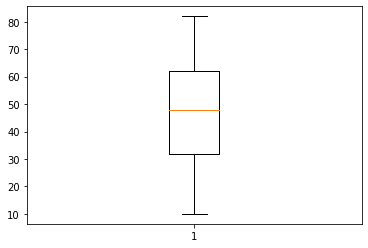

In [ ]:
# Visulasisasi Data "umur" untuk mencari Outlier
plt.boxplot(data_prep['umur'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f492400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f492e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4f4a38d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4f4a3550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f492710>,
  <matplotlib.lines.Line2D at 0x7f1c4f492a90>]}

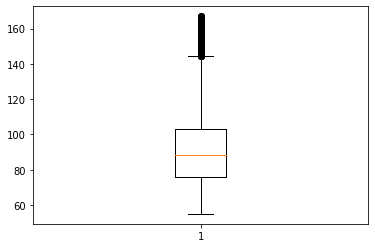

In [ ]:
#Buang data outlier pada rata2_level_glukosa dengan menggunakan metode IQR
Q1 = int(data_prep["rata2_level_glukosa"].quantile(0.25))
Q3 = int(data_prep["rata2_level_glukosa"].quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data_prep.loc[(data_prep["rata2_level_glukosa"]>Minimum)&(data_prep["rata2_level_glukosa"]<Maximum)]
plt.boxplot(data_prep['rata2_level_glukosa'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f435978>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f454390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4ff659e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c504ff780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f454518>,
  <matplotlib.lines.Line2D at 0x7f1c4f454278>]}

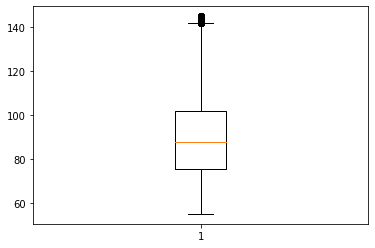

In [ ]:
#Buang data outlier pada rata2_level_glukosa dengan menggunakan metode IQR
Q1 = int(data_prep["rata2_level_glukosa"].quantile(0.25))
Q3 = int(data_prep["rata2_level_glukosa"].quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data_prep.loc[(data_prep["rata2_level_glukosa"]>Minimum)&(data_prep["rata2_level_glukosa"]<Maximum)]
plt.boxplot(data_prep['rata2_level_glukosa'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f3cdba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f3db5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4f3e70b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4f3dbcf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f3cdeb8>,
  <matplotlib.lines.Line2D at 0x7f1c4f3db278>]}

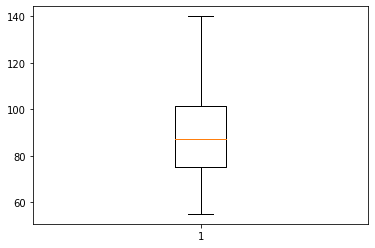

In [ ]:
#Buang data outlier pada rata2_level_glukosa dengan menggunakan metode IQR
Q1 = int(data_prep["rata2_level_glukosa"].quantile(0.25))
Q3 = int(data_prep["rata2_level_glukosa"].quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data_prep.loc[(data_prep["rata2_level_glukosa"]>Minimum)&(data_prep["rata2_level_glukosa"]<Maximum)]
plt.boxplot(data_prep['rata2_level_glukosa'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f3af3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f3afdd8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4f33d898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4f33d518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f3af6d8>,
  <matplotlib.lines.Line2D at 0x7f1c4f3afa58>]}

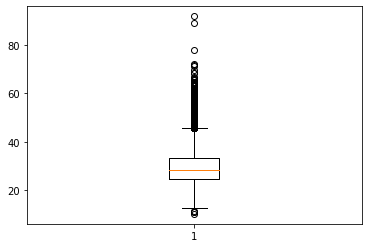

In [ ]:
plt.boxplot(data_prep['bmi'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f3122b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f312cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4f31f780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4f31f400>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f3125c0>,
  <matplotlib.lines.Line2D at 0x7f1c4f312940>]}

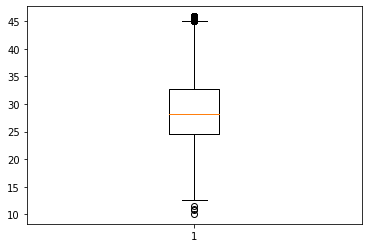

In [ ]:
#Buang data outlier pada bmi dengan menggunakan metode IQR
Q1 = int(data_prep["bmi"].quantile(0.25))
Q3 = int(data_prep["bmi"].quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data_prep.loc[(data_prep["bmi"]>Minimum)&(data_prep["bmi"]<Maximum)]
plt.boxplot(data_prep['bmi'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c4f274b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c4f284550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c4f284fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c4f284c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c4f274e10>,
  <matplotlib.lines.Line2D at 0x7f1c4f2841d0>]}

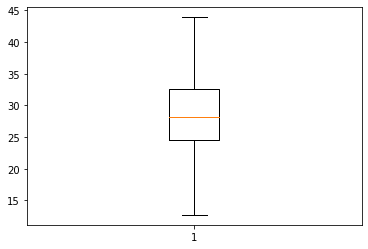

In [ ]:
#Buang data outlier pada bmi dengan menggunakan metode IQR
Q1 = int(data_prep["bmi"].quantile(0.25))
Q3 = int(data_prep["bmi"].quantile(0.75))
IQR = Q3-Q1
Maximum = int(Q3+1.5*IQR)
Minimum = int(Q1-1.5*IQR)
data_prep = data_prep.loc[(data_prep["bmi"]>Minimum)&(data_prep["bmi"]<Maximum)]
plt.boxplot(data_prep['bmi'])

In [ ]:
data_prep

,umur,rata2_level_glukosa,bmi,stroke,Perempuan,ya,ya,sudah,Wirausaha,belum bekerja,swasta,Perkotaan,perokok aktif,tidak
0,43,96.39,26.1,0,0,0,0,1,0,0,1,0,0,0
1,58,114.07,21.2,0,1,0,0,1,0,0,1,0,0,1
2,29,118.96,29.7,0,0,0,0,0,0,0,1,0,0,1
3,54,73.01,27.7,0,0,0,0,1,1,0,0,1,0,1
5,34,92.89,25.2,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,62,113.78,27.4,0,0,0,0,1,0,0,1,0,0,0
28071,79,127.96,34.0,0,0,0,0,1,1,0,0,1,0,0
28072,60,61.06,28.2,0,1,0,0,1,0,0,0,0,0,1
28073,29,108.14,25.1,0,1,0,0,1,0,0,1,0,0,0


In [ ]:
data_test

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok
0,2000,Laki-laki,24,tidak,tidak,belum,belum bekerja,Perkotaan,83.45,25.3,tidak
1,2001,Perempuan,81,tidak,tidak,sudah,swasta,Perkotaan,127.35,35.6,mantan perokok
2,2002,Laki-laki,41,tidak,tidak,sudah,PNS,Pedesaan,65.00,21.0,perokok aktif
3,2003,Laki-laki,30,tidak,tidak,sudah,Wirausaha,Perkotaan,88.30,32.0,tidak
4,2004,Laki-laki,50,ya,tidak,sudah,Wirausaha,Perkotaan,63.15,25.1,tidak
...,...,...,...,...,...,...,...,...,...,...,...
985,2985,Perempuan,63,ya,tidak,sudah,swasta,Pedesaan,64.43,29.7,tidak
986,2986,Perempuan,82,tidak,tidak,sudah,swasta,Pedesaan,60.22,19.5,tidak
987,2987,Laki-laki,34,tidak,tidak,sudah,swasta,Perkotaan,56.41,25.2,perokok aktif
988,2988,Laki-laki,20,tidak,tidak,belum,swasta,Pedesaan,102.11,27.1,tidak


In [ ]:
sex = pd.get_dummies(data_test["jenis_kelamin"], drop_first=True)
sex.head(10)

,Perempuan
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,1
9,0


In [ ]:
darah_tinggi = pd.get_dummies(data_test["hipertensi"], drop_first=True)
darah_tinggi.head(10)

,ya
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [ ]:
heart = pd.get_dummies(data_test["penyakit_jantung"], drop_first=True)
heart.head(10)

,ya
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
married = pd.get_dummies(data_test["sudah_menikah"], drop_first=True)
married.head(10)

,sudah
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
profesi = pd.get_dummies(data_test["jenis_pekerjaan"], drop_first=True)
profesi.head(10)

,Wirausaha,belum bekerja,swasta
0,0,1,0
1,0,0,1
2,0,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,0,1
7,0,0,1
8,0,0,0
9,0,0,1


In [ ]:
daerah = pd.get_dummies(data_test["jenis_tempat_tinggal"], drop_first=True)
daerah.head(10)

,Perkotaan
0,1
1,1
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,1


In [ ]:
smoke = pd.get_dummies(data_test["merokok"], drop_first=True)
smoke.head(10)

,perokok aktif,tidak
0,0,1
1,0,0
2,1,0
3,0,1
4,0,1
5,0,0
6,0,0
7,0,1
8,0,1
9,1,0


In [ ]:
data_prep_test = pd.concat([data_test,sex,darah_tinggi,heart,married,profesi,daerah,smoke], axis=1)
data_prep_test

,id_pasien,jenis_kelamin,umur,hipertensi,penyakit_jantung,sudah_menikah,jenis_pekerjaan,jenis_tempat_tinggal,rata2_level_glukosa,bmi,merokok,Perempuan,ya,ya,sudah,Wirausaha,belum bekerja,swasta,Perkotaan,perokok aktif,tidak
0,2000,Laki-laki,24,tidak,tidak,belum,belum bekerja,Perkotaan,83.45,25.3,tidak,0,0,0,0,0,1,0,1,0,1
1,2001,Perempuan,81,tidak,tidak,sudah,swasta,Perkotaan,127.35,35.6,mantan perokok,1,0,0,1,0,0,1,1,0,0
2,2002,Laki-laki,41,tidak,tidak,sudah,PNS,Pedesaan,65.00,21.0,perokok aktif,0,0,0,1,0,0,0,0,1,0
3,2003,Laki-laki,30,tidak,tidak,sudah,Wirausaha,Perkotaan,88.30,32.0,tidak,0,0,0,1,1,0,0,1,0,1
4,2004,Laki-laki,50,ya,tidak,sudah,Wirausaha,Perkotaan,63.15,25.1,tidak,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,2985,Perempuan,63,ya,tidak,sudah,swasta,Pedesaan,64.43,29.7,tidak,1,1,0,1,0,0,1,0,0,1
986,2986,Perempuan,82,tidak,tidak,sudah,swasta,Pedesaan,60.22,19.5,tidak,1,0,0,1,0,0,1,0,0,1
987,2987,Laki-laki,34,tidak,tidak,sudah,swasta,Perkotaan,56.41,25.2,perokok aktif,0,0,0,1,0,0,1,1,1,0
988,2988,Laki-laki,20,tidak,tidak,belum,swasta,Pedesaan,102.11,27.1,tidak,0,0,0,0,0,0,1,0,0,1


In [ ]:
#Drop Kolom yang tidak ingin dipakai
data_prep_test.drop(["id_pasien","jenis_kelamin", "hipertensi", "penyakit_jantung", "sudah_menikah", "jenis_pekerjaan","jenis_tempat_tinggal","merokok"], axis=1, inplace=True)  

In [ ]:
data_prep_test

,umur,rata2_level_glukosa,bmi,Perempuan,ya,ya,sudah,Wirausaha,belum bekerja,swasta,Perkotaan,perokok aktif,tidak
0,24,83.45,25.3,0,0,0,0,0,1,0,1,0,1
1,81,127.35,35.6,1,0,0,1,0,0,1,1,0,0
2,41,65.00,21.0,0,0,0,1,0,0,0,0,1,0
3,30,88.30,32.0,0,0,0,1,1,0,0,1,0,1
4,50,63.15,25.1,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,63,64.43,29.7,1,1,0,1,0,0,1,0,0,1
986,82,60.22,19.5,1,0,0,1,0,0,1,0,0,1
987,34,56.41,25.2,0,0,0,1,0,0,1,1,1,0
988,20,102.11,27.1,0,0,0,0,0,0,1,0,0,1


In [ ]:
stroke_true_count = len(data_prep.loc[data_prep['stroke'] == True])
stroke_false_count = len(data_prep.loc[data_prep['stroke'] == False])
(stroke_true_count, stroke_false_count)

(241, 22467)

In [ ]:
x_data = data_prep.drop("stroke",axis=1)
y_data = data_prep["stroke"]

In [ ]:
# Split data menjadi data training dan data test
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=4)

In [ ]:
# Membuat Model dan melakukan training
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#cek akurasi pada data test
akurasi = log_reg.score(x_test,y_test)
akurasi = akurasi*100

print("Akurasi model ini adalah : ", akurasi)

Akurasi model ini adalah :  98.92118009687363


In [ ]:
#cek performa model menggunakan confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, log_reg.predict(data_test))
matrix

array([[5542,    0],
       [  73,    0]])

In [ ]:
# Membuat variabel hasil prediksi dari data testing data_test dan tampilkan hasil prediksi
y_predict = log_reg.predict(data_prep_test)
y_predict = pd.DataFrame(y_predict)
y_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
985,0
986,0
987,0
988,0


In [ ]:
y_predict.to_csv('Hasil Prediksi.csv', index=False)

In [ ]:
id_num = data_test["id_pasien"]
id_num = pd.DataFrame(id_num)
id_num 

,id_pasien
0,2000
1,2001
2,2002
3,2003
4,2004
...,...
985,2985
986,2986
987,2987
988,2988


In [ ]:
final_predict = pd.concat([id_num, y_predict], axis=1)
final_predict

,id_pasien,0
0,2000,0
1,2001,0
2,2002,0
3,2003,0
4,2004,0
...,...,...
985,2985,0
986,2986,0
987,2987,0
988,2988,0


In [ ]:
final_predict.to_csv("Hasil Akhir Prediksi Stroke.csv", index=False)